In [1]:
## Loading Libraries
import pandas as pd
import numpy as np
import networkx as nx
from random import uniform
import random
import pickle
import datetime
from time import gmtime, strftime
import pytz
import winsound
import time
from copy import deepcopy


# import power_index_calculator as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from generateRandSeed import generateRandSeed
from plot_simulation_output import plot_simulation_output
from Simulate_SIR_Time import Simulate_SIR_Time
from TransmissionGraph import TransmissionGraph

## Loading Graphs

In [3]:
path=r'C:\Users\Mahdi\OneDrive\Vasserman - Akbarpour\Data\ResultMultigraphs/'
with open(path+"GraphList_Multi", 'rb') as fp:
    GraphList = pickle.load(fp) 

In [4]:
# Graph Size
Size = []
for G in GraphList:
    Size.append(G.number_of_nodes())

Graph_size_dict = {k:v for k,v in zip(list(range(len(GraphList))),Size)}
Graph_size_dict = {k: v for k, v in sorted(Graph_size_dict.items(), key=lambda item: item[1],reverse=True)}
list(Graph_size_dict.items())[0]

(57, 356)

# Run Your Simulation

In the below example, we create an Erdos-Renyi graph and we run the simulation and plot the outputs.

The Peak is 0.363, and the Cascade is 0.665, and Peak_int is 3


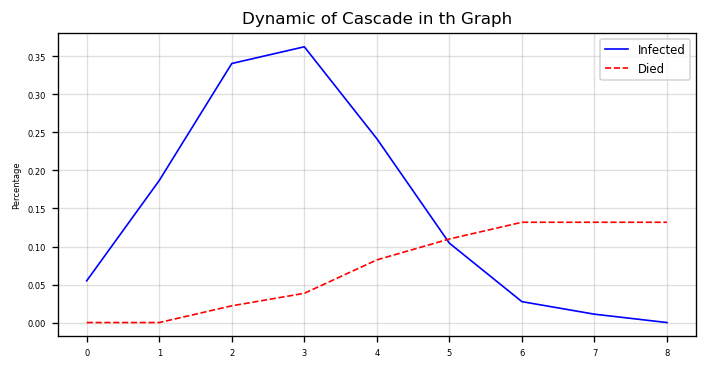

Wall time: 14 s


()

In [6]:
%%time
# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0.2,"Visit":0.2,"Kerosene":0.2,"Temple":0.2}
G_list = TransmissionGraph(Data=data,dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = Simulate_SIR_Time (deepcopy(G),Maximum_Time=1000,
                         Seasons=[50,100,150,200],P_seasons = [1,1,1,1],
                         Seeds = generateRandSeed(10,G), 
                         n_dr=1, q_die=0.2, n_exposed=0,q_symptotic=0, q_s=0.5,
                         how='Transmission',
                         time_policy={'mode':'stochastic','stochastic':{'p':1},
                        'deterministic':{'group_num':2,'method':'divide'}},pnt=False)

print('The Peak is {:0.3f}, and the Cascade is {:0.3f}, and Peak_int is {}'.format(
    out['Peak'],out['Cascade'],out['Peak_int']))
plot_simulation_output(Graphsize=G.number_of_nodes(),data = out,module=['Infected','Died'])

# **Simulation**

In [28]:
def find_Cascade_Lambda(G,number_seed,repeat):

    OUT = {'Cascade':list()}

    for i in range(repeat):
        out = Simulate_SIR_Time(deepcopy(G),Maximum_Time=1000,
                           Seasons=[50,100,150,200],P_seasons = [1,1,1,1],
                           Seeds = generateRandSeed(number_seed,G), 
                           n_dr=1, q_die=0.2, n_exposed=0,q_symptotic=0, q_s=1,
                           how='Transmission',
                           time_policy={'mode':'stochastic','stochastic':{'p':1},
                                        'deterministic':{'group_num':2,'method':'stochastic'}},pnt=False)
        
        OUT['Cascade'].append(out['Cascade'])


    w,v = np.linalg.eigh(nx.adjacency_matrix(G,weight=None).A)    
    Lambda=  np.round(max(w),4)
    w,v = np.linalg.eigh(nx.adjacency_matrix(G,weight='weight').A)    
    Lambda_weighted =  np.round(max(w),4)
    
    out_des = pd.DataFrame(OUT).describe()
    
    out = {'Cascade':np.round(out_des.loc['mean','Cascade'],4),'lambda':Lambda,'lambda_weighted':Lambda_weighted}

    return(out)

In [38]:
%%time

i=57
repeat = 50
number_seed = 10

res = []
res_ind = []


####################################################################################
## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0.2,"Visit":0.2,"Kerosene":0.2,"Temple":0.2}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('No Policy')
res.append(out)

####################################################################################

## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0,"Visit":0.2,"Kerosene":0.2,"Temple":0.2}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('Ban Money')
res.append(out)

####################################################################################

## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0.2,"Visit":0,"Kerosene":0.2,"Temple":0.2}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('Ban Visit')
res.append(out)

####################################################################################

## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0.2,"Visit":0.2,"Kerosene":0,"Temple":0.2}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('Ban Kerosene')
res.append(out)

####################################################################################

## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0.2,"Visit":0.2,"Kerosene":0.2,"Temple":0}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('Ban Temple')
res.append(out)

###################################################################################

## Progress
now = datetime.datetime.now() 
print ("\nCurrent time is: ")
print (now.strftime("%H:%M:%S"))

# Copying mulitigraph (Otherwise it's chnaged in the each run)
data = [deepcopy(x) for x in GraphList]
# Creating the graph with given P and filteration policy
Dict = {"Money":0,"Visit":0,"Kerosene":0.2,"Temple":0.2}
G_list = TransmissionGraph(Data=data[i:(i+1)],dropNode='',dropTop=0,Label_dict = Dict)
G = G_list[0]

out = find_Cascade_Lambda(deepcopy(G),number_seed=number_seed,repeat=repeat)
res_ind.append('Ban Moeny and Visit')
res.append(out)

###################################################################################


for i in range(3):
    time.sleep(0.5)
    duration = 500  # milliseconds
    freq = 840  # Hz
    winsound.Beep(freq, duration)


Current time is: 
00:08:27

Current time is: 
00:08:35

Current time is: 
00:08:43

Current time is: 
00:08:50

Current time is: 
00:08:58

Current time is: 
00:09:06
Wall time: 48.5 s


In [40]:
Results = pd.DataFrame(res,index=res_ind)
Results['change_Cascade'] = Results['Cascade'] - Results.loc['No Policy','Cascade']
Results['change_Cascade_rank'] = Results['change_Cascade'].rank(method='min')

Results['change_lambda'] = Results['lambda'] - Results.loc['No Policy','lambda']
Results['change_lambda_rank'] = Results['change_lambda'].rank(method='min')

Results['change_lam_wei'] = Results['lambda_weighted'] - Results.loc['No Policy','lambda_weighted']
Results['change_lam_wei_rank'] = Results['change_lam_wei'].rank(method='min')
Results

,Cascade,lambda,lambda_weighted,change_Cascade,change_Cascade_rank,change_lambda,change_lambda_rank,change_lam_wei,change_lam_wei_rank
No Policy,0.7543,11.0465,3.9725,0.0000,6.0,0.0000,6.0,0.0000,6.0
Ban Money,0.6408,10.0497,2.9779,-0.1135,3.0,-0.9968,3.0,-0.9946,3.0
Ban Visit,0.5843,9.3180,2.7250,-0.1700,2.0,-1.7285,2.0,-1.2475,2.0
Ban Kerosene,0.6521,10.4076,3.0098,-0.1022,4.0,-0.6389,4.0,-0.9627,4.0
Ban Temple,0.7529,10.9892,3.9262,-0.0014,5.0,-0.0573,5.0,-0.0463,5.0
Ban Moeny and Visit,0.1785,7.5794,1.5688,-0.5758,1.0,-3.4671,1.0,-2.4037,1.0
